# DTSA 5510: Unsupervised Machine Learning Final Project

## Project Overview  
### Explanation  
This project will look at data from the UCI Machine Learning Repository focused on identifying the type of erythemato-squamous disease based on a patients clinical features. I will be attempting various unsupervised learning methods, starting with clustering, to determine where the groups lie and if those match to the actual values.  

### Goal
In achieving the goal for this project we will have a better idea of how the feature set provided in this data set segment the project. This will give an idea if they are appropriate enough to be able to classify the specfic type of disease or if more information would be better to allow a doctor to make that determination.

In [79]:
# Setup steps
# - Import libraries needed for project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from itertools import permutations

## Data and EDA

### Source
Data for this project was obtained from the UCI Machine Learning Repository. It contains data from dermatology patients that are used to determine the type of erythemato-squamous disease they have. 366 samples exist in this data set, with 34 attributes. Full details from the UCI Repository are contained below.
Attribute Information:  

Clinical Attributes: (take values 0, 1, 2, 3, unless otherwise indicated)  
      1. erythema  
      2. scaling  
      3. definite borders   
      4. itching  
      5. koebner phenomenon  
      6. polygonal papules  
      7. follicular papules  
      8. oral mucosal involvement  
      9. knee and elbow involvement  
     10. scalp involvement  
     11. family history, (0 or 1)  
     34. Age (linear)  

Histopathological Attributes: (take values 0, 1, 2, 3)  
     12. melanin incontinence  
     13. eosinophils in the infiltrate  
     14. PNL infiltrate  
     15. fibrosis of the papillary dermis  
     16. exocytosis  
     17. acanthosis  
     18. hyperkeratosis  
     19. parakeratosis  
     20. clubbing of the rete ridges  
     21. elongation of the rete ridges  
     22. thinning of the suprapapillary epidermis  
     23. spongiform pustule  
     24. munro microabcess  
     25. focal hypergranulosis  
     26. disappearance of the granular layer  
     27. vacuolisation and damage of basal layer  
     28. spongiosis  
     29. saw-tooth appearance of retes  
     30. follicular horn plug  
     31. perifollicular parakeratosis  
     32. inflammatory monoluclear inflitrate  
     33. band-like infiltrate  

**Citation**: Ilter,Nilsel & Guvenir,H.. (1998). Dermatology. UCI Machine Learning Repository. https://doi.org/10.24432/C5FK5P.  
**Direct Link**: https://archive-beta.ics.uci.edu/dataset/33/dermatology

In [43]:
# Import data
# - Import data
# - Display dimensions
# - Print first 5 rows
# - Display attributes
col_names = ['erythema', 'scaling', 'definite_borders', 'itching',
             'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
             'oral_mucosal_involvement', 'knee_elbow_involvement', 
             'scalp_involvement', 'family_history', 'melanin_incontinence',
             'eosinophils_infiltrate', 'PNL_infiltrate', 'fibrosis',
             'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis',
             'clubbing_rete', 'elogation_rete', 'thinning', 'spongiform_pustule', 
             'munro_microabcess', 'focal_hypergranulosis', 'granular_disappearance',
             'basal_damage', 'spongiosis', 'retes_sawtooth', 'follicular_horn',
             'perifollicular_parakeratosis', 'inflammatory_mono_infiltrate',
             'band_infiltrate', 'age', 'disease']
disease_dict = {1: 'psoriasis', 2: 'seboreic_dermatitis',
                3: 'lichen planus', 4: 'pityriasis rosea',
                5: 'cronic dermatitis', 6: 'pityriasis rubra pilaris'}
health_data = pd.read_csv('dermatology.data', header=None, names=col_names)
data_shape = health_data.shape
print(f"Data size includes {data_shape[0]} samples with {data_shape[1]} attributes.")
health_data.head(5)

Data size includes 366 samples with 35 attributes.


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_elbow_involvement,scalp_involvement,...,granular_disappearance,basal_damage,spongiosis,retes_sawtooth,follicular_horn,perifollicular_parakeratosis,inflammatory_mono_infiltrate,band_infiltrate,age,disease
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


### Cleaning  
The write up for this data set notes that the age column has missing values. Querying we can see that this is a relatively small amount of the data set (8 rows out of 366), so for the purposes of this assignment we will just drop them.

In [46]:
# Replace numberic values of disease with actual name value
health_data['disease'] = [disease_dict[x] for x in health_data.disease]

In [48]:
# Identify columns missing age values
missing_age = health_data.age == '?'
print(f"{missing_age.sum()} samples missing age values.")
print(f"Disease types of rows to be dropped: {health_data[missing_age].disease.to_list()}")

8 samples missing age values.
Disease types of rows to be dropped: ['psoriasis', 'pityriasis rosea', 'seboreic_dermatitis', 'lichen planus', 'cronic dermatitis', 'cronic dermatitis', 'cronic dermatitis', 'cronic dermatitis']


In [49]:
# Perform data cleaning
health_data = health_data[~missing_age]

In [50]:
# Look at data types in each column
health_data.dtypes

erythema                         int64
scaling                          int64
definite_borders                 int64
itching                          int64
koebner_phenomenon               int64
polygonal_papules                int64
follicular_papules               int64
oral_mucosal_involvement         int64
knee_elbow_involvement           int64
scalp_involvement                int64
family_history                   int64
melanin_incontinence             int64
eosinophils_infiltrate           int64
PNL_infiltrate                   int64
fibrosis                         int64
exocytosis                       int64
acanthosis                       int64
hyperkeratosis                   int64
parakeratosis                    int64
clubbing_rete                    int64
elogation_rete                   int64
thinning                         int64
spongiform_pustule               int64
munro_microabcess                int64
focal_hypergranulosis            int64
granular_disappearance   

Because the age column originally contained '?'s for missing values, we need to convert it back to an integer type.

In [51]:
# Convert age column to integer
health_data['age'] = health_data.age.astype(int)

### Exploratory Data Analysis (EDA)  
First we will look at the distribution of age and disease type present in the data.

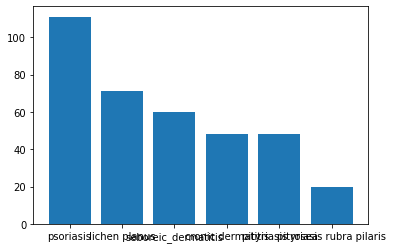

In [75]:
# Perform EDA
count = health_data['disease'].value_counts()
plt.bar(count.index, count.values)
plt.show()

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

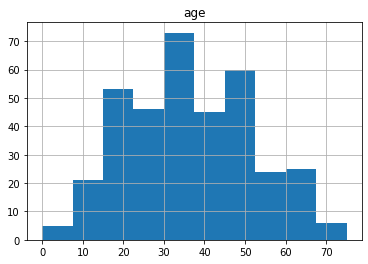

In [76]:
health_data.hist(column='age')

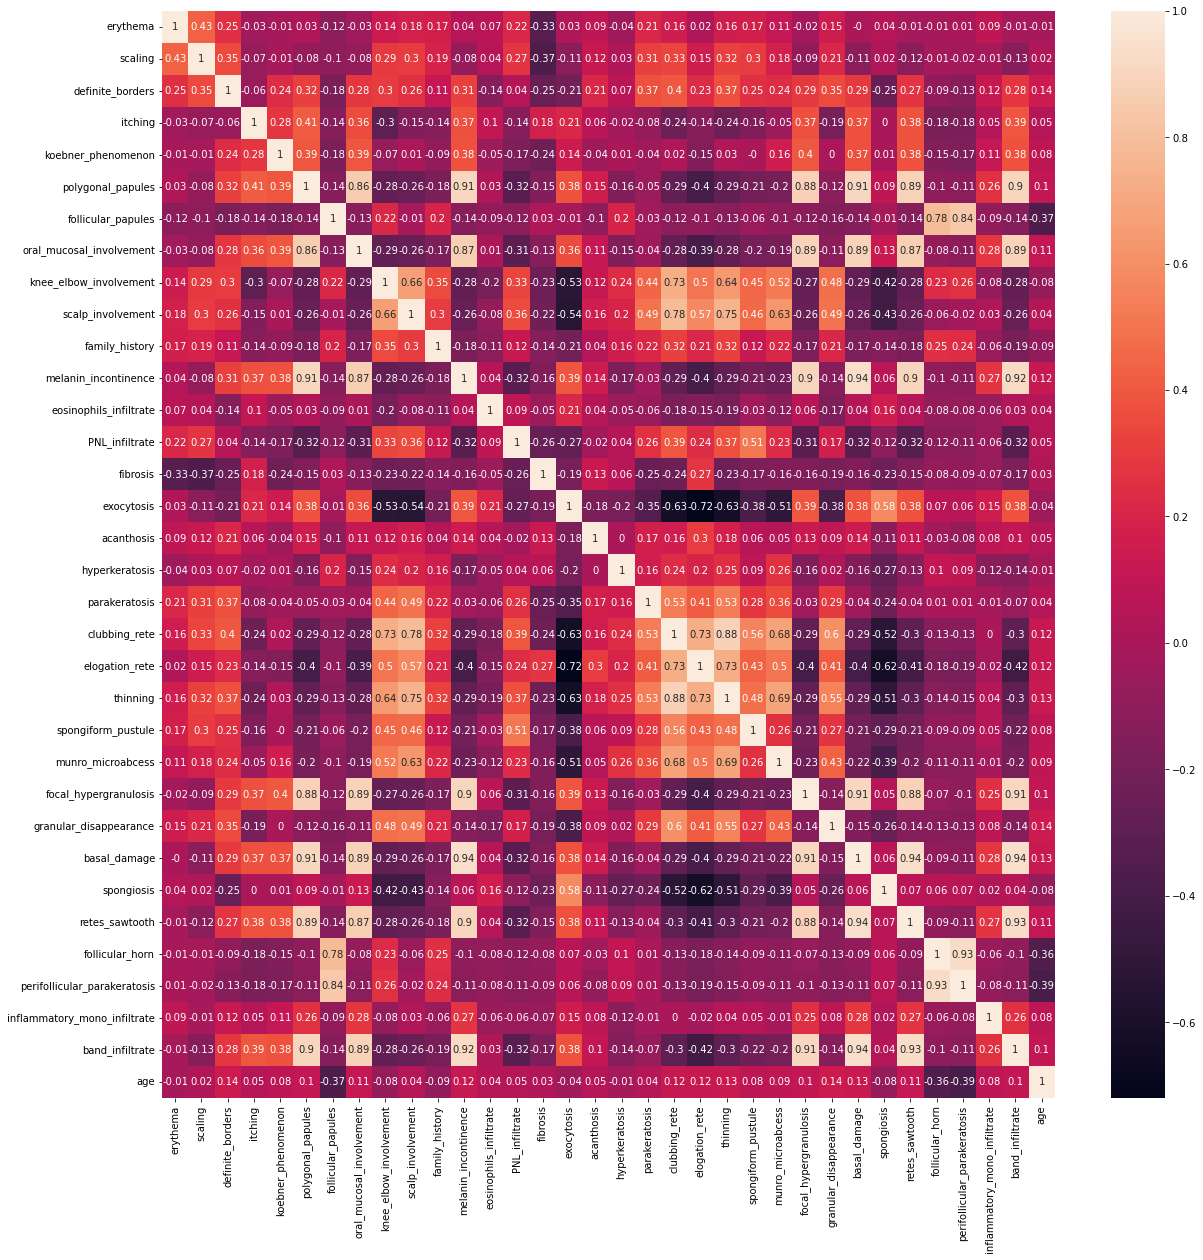

In [77]:
# Correlation matrix
fig, ax = plt.subplots(figsize=(20,20))
corr_matrix = health_data.corr().round(2)
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Modeling and Analysis

### Create unsupervised machine learning model  
For this project we are going to try to use clustering to group our samples into 6 groups and see how this compares to the actual sample group. 

In [100]:
# Create model(s)
cluster_model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward').fit(health_data.drop('disease', axis=1))
print(cluster_model)
print(cluster_model.labels_)

AgglomerativeClustering(n_clusters=6)
[1 5 3 0 0 0 4 2 4 3 4 4 4 5 2 0 3 0 4 4 5 1 0 0 4 0 5 4 0 1 1 5 0 4 3 1 1
 2 4 0 3 1 0 4 1 2 3 0 0 1 1 4 4 3 3 0 5 0 0 0 0 2 0 4 0 4 0 4 1 1 4 3 3 2
 1 3 0 3 3 5 1 3 0 1 3 3 1 0 3 0 4 4 0 2 3 4 4 2 0 4 0 0 2 0 0 0 0 4 0 0 1
 4 3 1 3 5 3 0 5 3 3 4 5 0 4 4 2 0 0 3 0 3 2 0 0 3 4 4 2 3 0 0 1 3 3 0 0 3
 1 1 3 0 1 3 0 0 0 2 4 5 4 2 2 1 4 4 0 2 2 4 0 3 0 0 0 0 3 2 2 4 5 3 4 1 1
 3 1 0 3 4 0 4 1 1 3 0 4 4 1 0 0 2 4 2 0 3 1 2 3 3 1 3 1 0 0 0 3 0 4 3 0 0
 0 4 1 0 3 0 1 2 2 1 0 1 2 5 5 3 2 1 0 3 2 2 4 1 0 2 0 3 1 1 0 3 2 4 0 0 5
 5 5 0 2 0 3 2 2 0 4 3 4 1 1 3 2 3 2 4 0 0 3 0 3 0 3 1 0 5 4 0 2 1 3 0 1 0
 4 3 4 1 5 0 1 0 3 4 3 1 2 1 1 2 3 3 3 2 1 0 0 1 4 1 0 4 0 0 2 2 2 0 0 1 0
 2 1 5 4 0 0 4 5 5 3 5 2 0 1 0 2 1 3 0 3 3 0 3 1 0]


In [98]:
# Model accuracy function for permutations
def label_permute_compare(ytdf,yp,vals):
    """
    ytdf: labels dataframe object
    yp: clustering label prediction output
    Returns permuted label order and accuracy. 
    Example output: (3, 4, 1, 2, 0), 0.74 
    """
# your code here
    best_combo = None
    best_accuracy = 0

    n = len(vals)
    perms = permutations(range(n),n)
    
    for perm in perms:
        new_series = ytdf.replace(to_replace=vals, value=perm)
        
        accuracy = metrics.accuracy_score(new_series, yp)
        # print(perm, accuracy)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_combo = perm
            
    return (best_combo, best_accuracy)

In [101]:
# Determine accuracy of model
permutation, accuracy = label_permute_compare(health_data.disease, cluster_model.labels_, disease_dict.values())
print(f"Accuracy: {accuracy}, label permutation: {permutation}")

Accuracy: 0.2905027932960894, label permutation: (2, 0, 1, 3, 4, 5)


In [102]:
# Confusion matrix to visualize bad accuracy
value = health_data.disease.replace(to_replace=disease_dict.values(), 
                                                       value=permutation)

metrics.confusion_matrix(value, cluster_model.labels_)

array([[20, 11,  2, 12, 13,  2],
       [22, 20,  6, 17,  6,  0],
       [31, 16, 27, 21, 12,  4],
       [18,  3,  5, 11, 10,  1],
       [16,  8,  5,  7, 11,  1],
       [ 0,  0,  0,  0,  5, 15]])

In [105]:
# Programmatically look for best combination of linkage and distance metrics
affinity = ['l1', 'l2', 'manhattan', 'cosine']
linkage  = ['complete', 'average', 'single']
linkage_distance_metrics = [(aff, link) for aff in affinity 
                                        for link in linkage]
linkage_distance_metrics.append(('euclidean','ward'))

best_model = None
best_accuracy = 0
best_aff = None
best_link = None
out_labels = None

for aff, link in linkage_distance_metrics:
    model = AgglomerativeClustering(n_clusters=5, affinity=aff, linkage=link).fit(health_data.drop('disease', axis=1))
    labelorder, acc = label_permute_compare(health_data.disease, model.labels_, disease_dict.values())
    print(f"Affinity: {aff}, Linkage: {link}, Accuracy: {acc:0.4f}")
    
    if acc > best_accuracy:
        best_model = model
        best_accuracy = acc
        best_aff = aff
        best_link = link
        out_labels = labelorder

print()
print(f"The best model was one with linkage set to {best_link} and affinity {best_aff}.")
print(f"Accuracy of this model was {best_accuracy:0.4f} with the following confusion matrix.")

value = health_data.disease.replace(to_replace=disease_dict.values(), 
                                                       value=permutation)
metrics.confusion_matrix(value, cluster_model.labels_)

Affinity: l1, Linkage: complete, Accuracy: 0.5531
Affinity: l1, Linkage: average, Accuracy: 0.5223
Affinity: l1, Linkage: single, Accuracy: 0.2989
Affinity: l2, Linkage: complete, Accuracy: 0.2598
Affinity: l2, Linkage: average, Accuracy: 0.3073
Affinity: l2, Linkage: single, Accuracy: 0.3156
Affinity: manhattan, Linkage: complete, Accuracy: 0.5531
Affinity: manhattan, Linkage: average, Accuracy: 0.5223
Affinity: manhattan, Linkage: single, Accuracy: 0.2989
Affinity: cosine, Linkage: complete, Accuracy: 0.3324
Affinity: cosine, Linkage: average, Accuracy: 0.3575
Affinity: cosine, Linkage: single, Accuracy: 0.3045
Affinity: euclidean, Linkage: ward, Accuracy: 0.2737

The best model was one with linkage set to complete and affinity l1.
Accuracy of this model was 0.5531 with the following confusion matrix.


array([[20, 11,  2, 12, 13,  2],
       [22, 20,  6, 17,  6,  0],
       [31, 16, 27, 21, 12,  4],
       [18,  3,  5, 11, 10,  1],
       [16,  8,  5,  7, 11,  1],
       [ 0,  0,  0,  0,  5, 15]])

### Results, Analysis, and Conclusions

As we can see, the accuracy of our model was not great with the best combination reaching an accuracy of 0.553. Looking at the confusion matrix we can see many instances of misclassification. The question now is why?  

I think the cause of this is two-fold. First off, if we note back to the summary of the data, the domain experts for this data noted that a lot of these diseases have overlapping features. As such, we can image the case where there is some missing feature not included that actually is the determining factor such as maybe response to particular treatments. The second cause also noting back to the data description is the way features were captured ranging from 0-3 to denote aspects of that feature. This could cause some unknown response or interaction that may be causing issues. Overall, I think more information from domain experts could help us understand where we could do better.